In [ ]:
#import thư viện
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mean_squared_error

# Data Overview

Id : Restaurant id

Open Date : opening date for a restaurant

City : City that the restaurant is in. Note that there are unicode in the names

City Group: Type of the city. Big cities, or Other.

Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile

P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.

Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis

In [ ]:
train_df=pd.read_csv('/content/train.csv')
test_df=pd.read_csv('/content/test.csv')

In [ ]:
train_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [ ]:
train_df.shape

(137, 43)

In [ ]:
test_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,5653753.0
1,1,3/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,5/6/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,3.0,0,4,0,0,0,0,0,0,2675511.0
4,4,7/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,4316715.0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

In [ ]:
test_df.shape

(100000, 43)

train.csv - the training set. Use this dataset for training your model.

test.csv - the test set. To deter manual "guess" predictions, Kaggle has supplemented the test set with additional "ignored" data.

# Data Cleaning

In [ ]:
train_df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [ ]:
test_df.isnull().sum()

Id                0
Open Date         0
City              0
City Group        0
Type              0
P1                0
P2                0
P3                0
P4                0
P5                0
P6                0
P7                0
P8                0
P9                0
P10               0
P11               0
P12               0
P13               0
P14               0
P15               0
P16               0
P17               0
P18               0
P19               0
P20               0
P21               0
P22               0
P23               0
P24               0
P25               0
P26               0
P27               0
P28               0
P29               0
P30               0
P31               0
P32               0
P33               0
P34               0
P35               0
P36               0
P37               0
revenue       99863
dtype: int64

In [ ]:
train_df.duplicated().sum()

0

In [ ]:
test_df.duplicated().sum()

0

In [ ]:
train_df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [ ]:
test_df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.370000e+02
mean,49999.500000,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,...,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500,4.453533e+06
std,28867.657797,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,...,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,24999.750000,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,49999.500000,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,74999.250000,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,...,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,99999.000000,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,...,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000,1.969694e+07


In [ ]:
test_df.drop("Id", axis=1, inplace=True)

In [ ]:
train_df["Open Date"] = pd.to_datetime(train_df["Open Date"])
train_df["Day"] = train_df["Open Date"].dt.day
train_df["Day_Name"] = train_df["Open Date"].dt.day_name()
train_df["Month"] = train_df["Open Date"].dt.month
train_df["Years"] = train_df["Open Date"].dt.year
train_df.drop("Open Date",axis=1,inplace=True)
#########
test_df["Open Date"] = pd.to_datetime(test_df["Open Date"])
test_df["Day"] = test_df["Open Date"].dt.day
test_df["Day_Name"] = test_df["Open Date"].dt.day_name()
test_df["Month"] = test_df["Open Date"].dt.month
test_df["Years"] = test_df["Open Date"].dt.year
test_df.drop("Open Date",axis=1,inplace=True)

In [ ]:
train_df["City"].unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [ ]:
train_df["City Group"].unique()

array(['Big Cities', 'Other'], dtype=object)

# EDA

<ipython-input-19-ee413ef4a745>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y= train_df["City"],palette="summer")


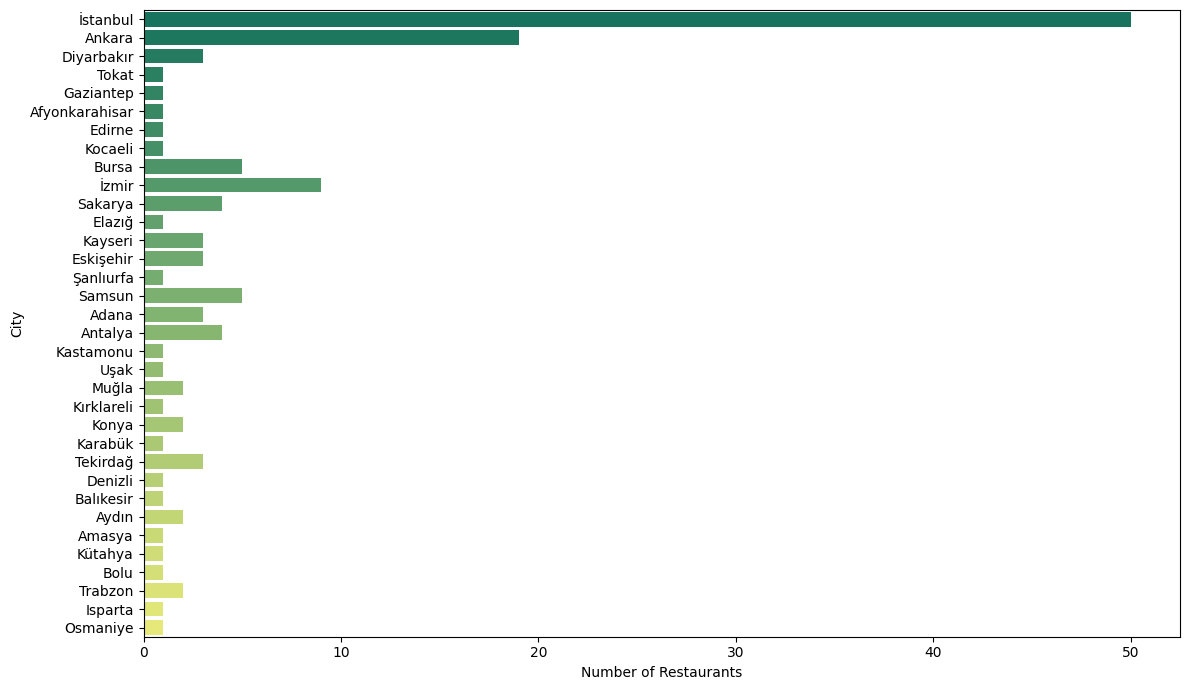

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(y= train_df["City"],palette="summer")
plt.xlabel("Number of Restaurants")
plt.tight_layout()

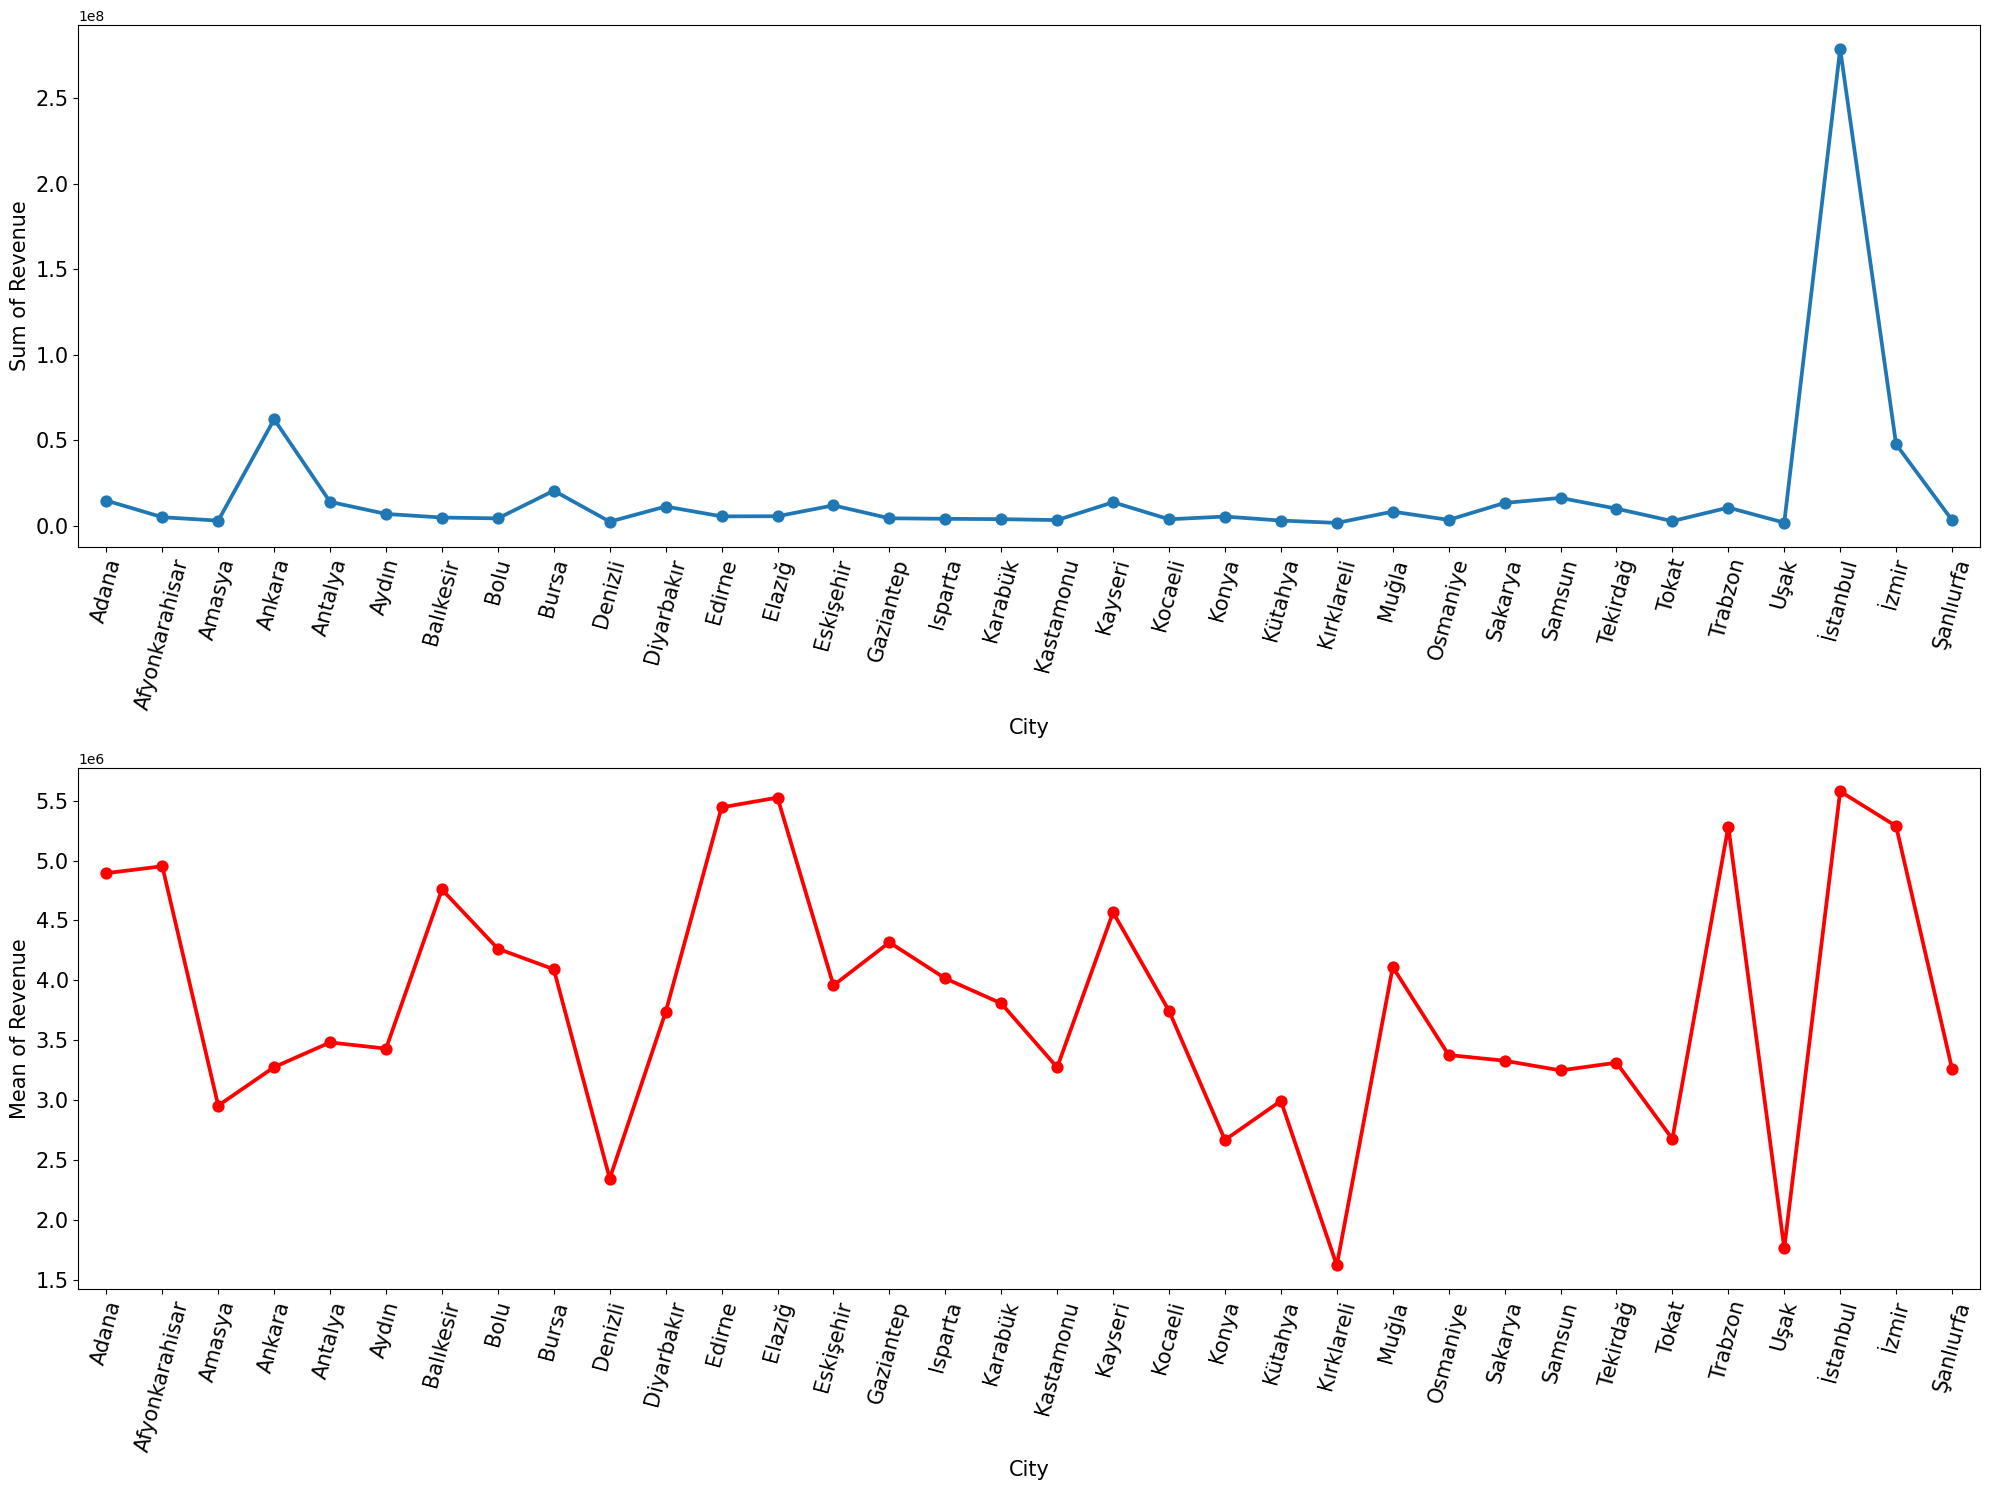

In [ ]:
city_df = train_df.groupby("City")["revenue"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (20,15))
ax1 = sns.pointplot(x=city_df["City"],y=city_df["sum"],ax=ax[0])
ax1.tick_params(axis= "x" ,labelsize=15,labelrotation=75)
ax1.tick_params(axis= "y" ,labelsize=15)
ax1.set_xlabel("City", fontsize=15)
ax1.set_ylabel("Sum of Revenue", fontsize=15)
ax2 = sns.pointplot(x=city_df["City"],y=city_df["mean"],ax=ax[1],color = "r")
ax2.tick_params(axis= "x" ,labelsize=15,labelrotation=75)
ax2.tick_params(axis= "y" ,labelsize=15)
ax2.set_xlabel("City", fontsize=15)
ax2.set_ylabel("Mean of Revenue", fontsize=15)
plt.tight_layout()

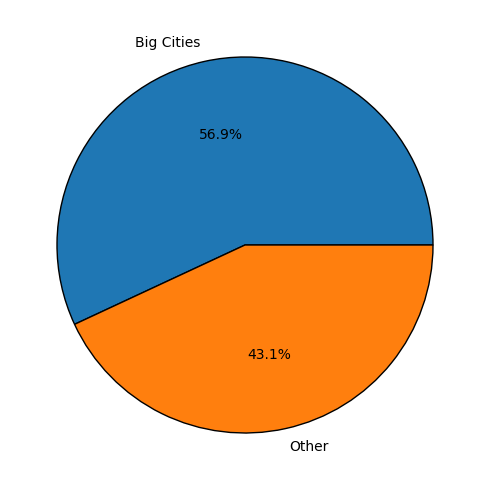

In [ ]:
plt.figure(figsize=(8,5))
group_dict = dict(train_df["City Group"].value_counts())
plt.pie(group_dict.values(),labels=group_dict.keys(),wedgeprops={"edgecolor":"black"},autopct="%1.1f%%")
plt.tight_layout()

<ipython-input-22-e30fe218b3c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=cityg_df["City Group"],y=cityg_df["sum"],ax=ax[0],palette="summer")
<ipython-input-22-e30fe218b3c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=cityg_df["City Group"],y=cityg_df["mean"],ax=ax[1],palette="summer")


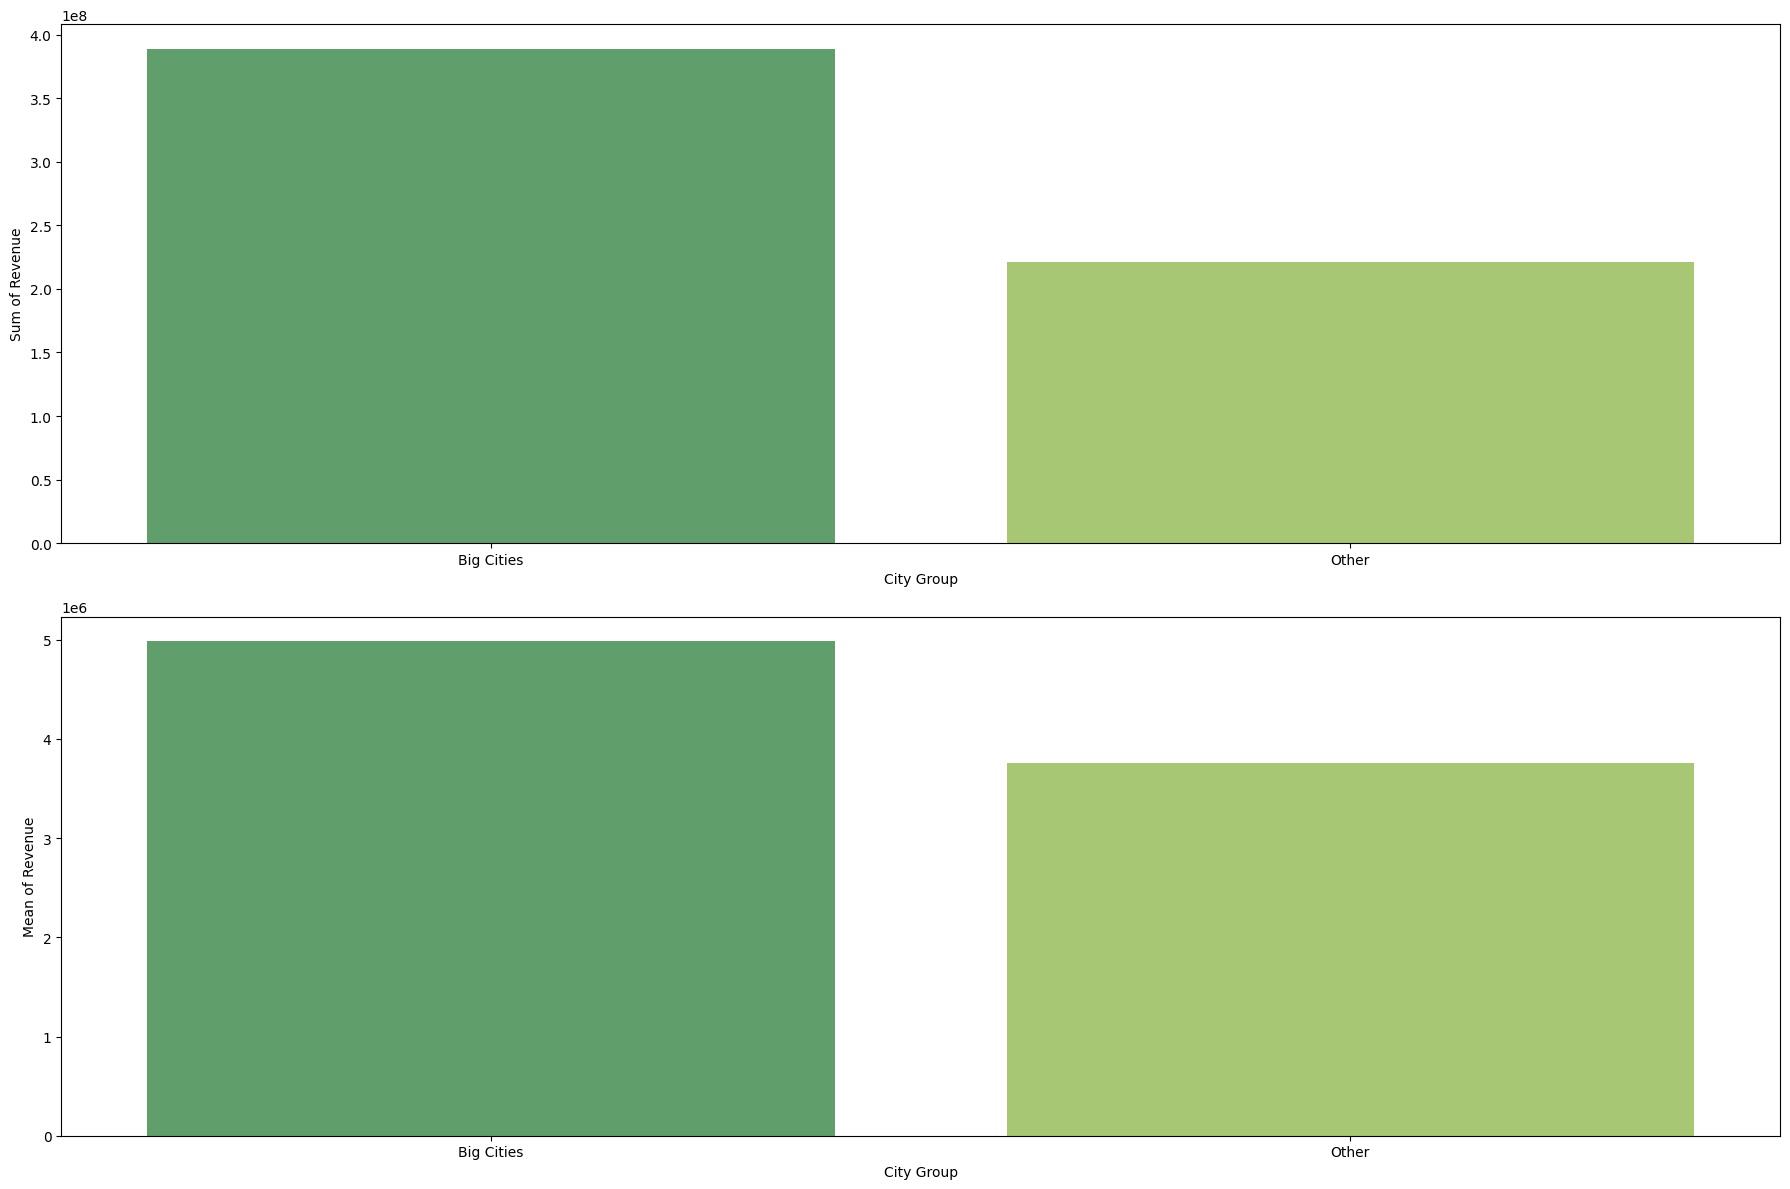

In [ ]:
cityg_df = train_df.groupby("City Group")["revenue"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1 = sns.barplot(x=cityg_df["City Group"],y=cityg_df["sum"],ax=ax[0],palette="summer")
ax1.set_ylabel("Sum of Revenue")
ax2 = sns.barplot(x=cityg_df["City Group"],y=cityg_df["mean"],ax=ax[1],palette="summer")
ax2.set_ylabel("Mean of Revenue")
plt.tight_layout()

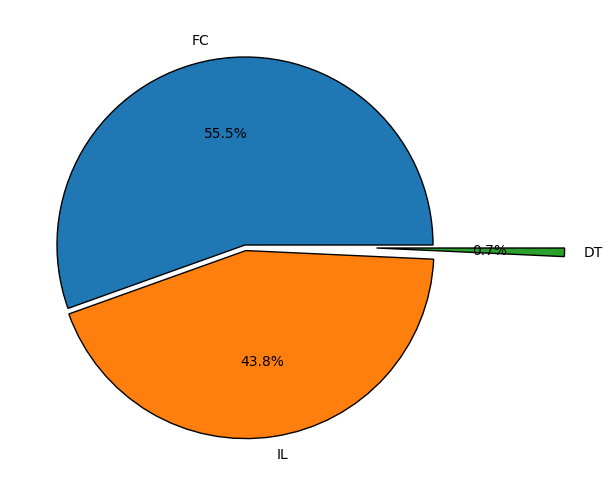

In [ ]:
plt.figure(figsize=(8,5))
type_dict = dict(train_df["Type"].value_counts())
ex = [0,0.03,0.7]
plt.pie(type_dict.values(),labels=type_dict.keys(),explode = ex,wedgeprops={"edgecolor":"black"},autopct="%1.1f%%")
plt.tight_layout()


<ipython-input-24-69d7a5088cf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=type_df["Type"],y=type_df["sum"],ax=ax[0],palette="summer")
<ipython-input-24-69d7a5088cf7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=type_df["Type"],y=type_df["mean"],ax=ax[1],palette="summer")


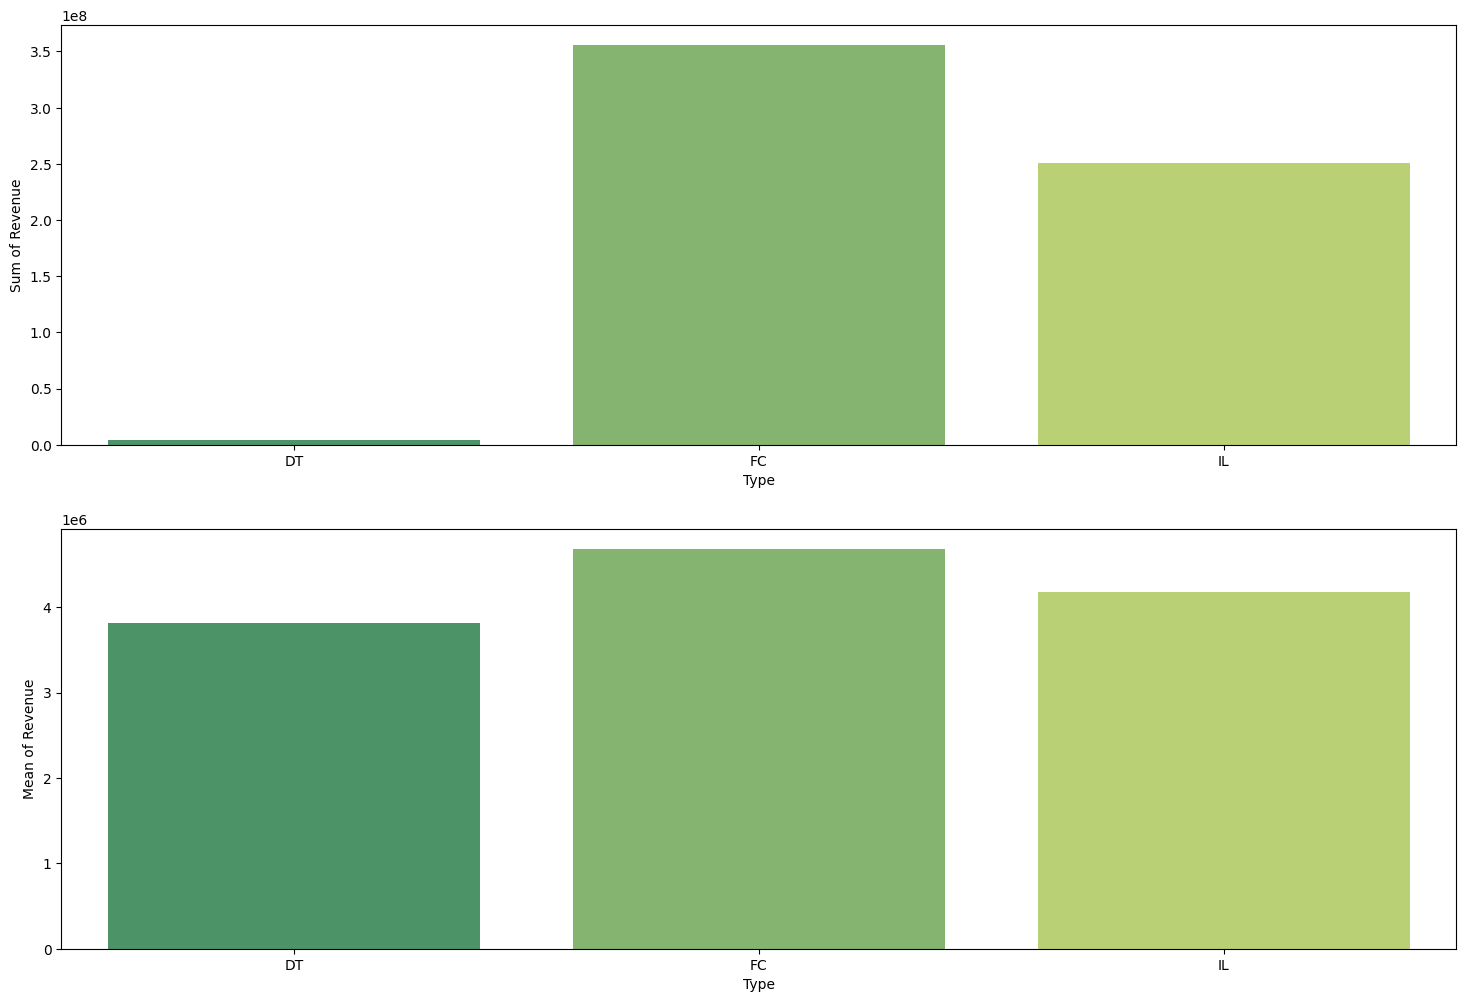

In [ ]:
type_df = train_df.groupby("Type")["revenue"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1 = sns.barplot(x=type_df["Type"],y=type_df["sum"],ax=ax[0],palette="summer")
ax1.set_ylabel("Sum of Revenue")
ax2 = sns.barplot(x=type_df["Type"],y=type_df["mean"],ax=ax[1],palette="summer")
ax2.set_ylabel("Mean of Revenue")
plt.show()

<ipython-input-25-008209a8d6ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=Month_df["Month"],y=Month_df["sum"],ax=ax[0],palette = "summer")
<ipython-input-25-008209a8d6ed>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=Month_df["Month"],y=Month_df["mean"],ax=ax[1],palette = "summer")


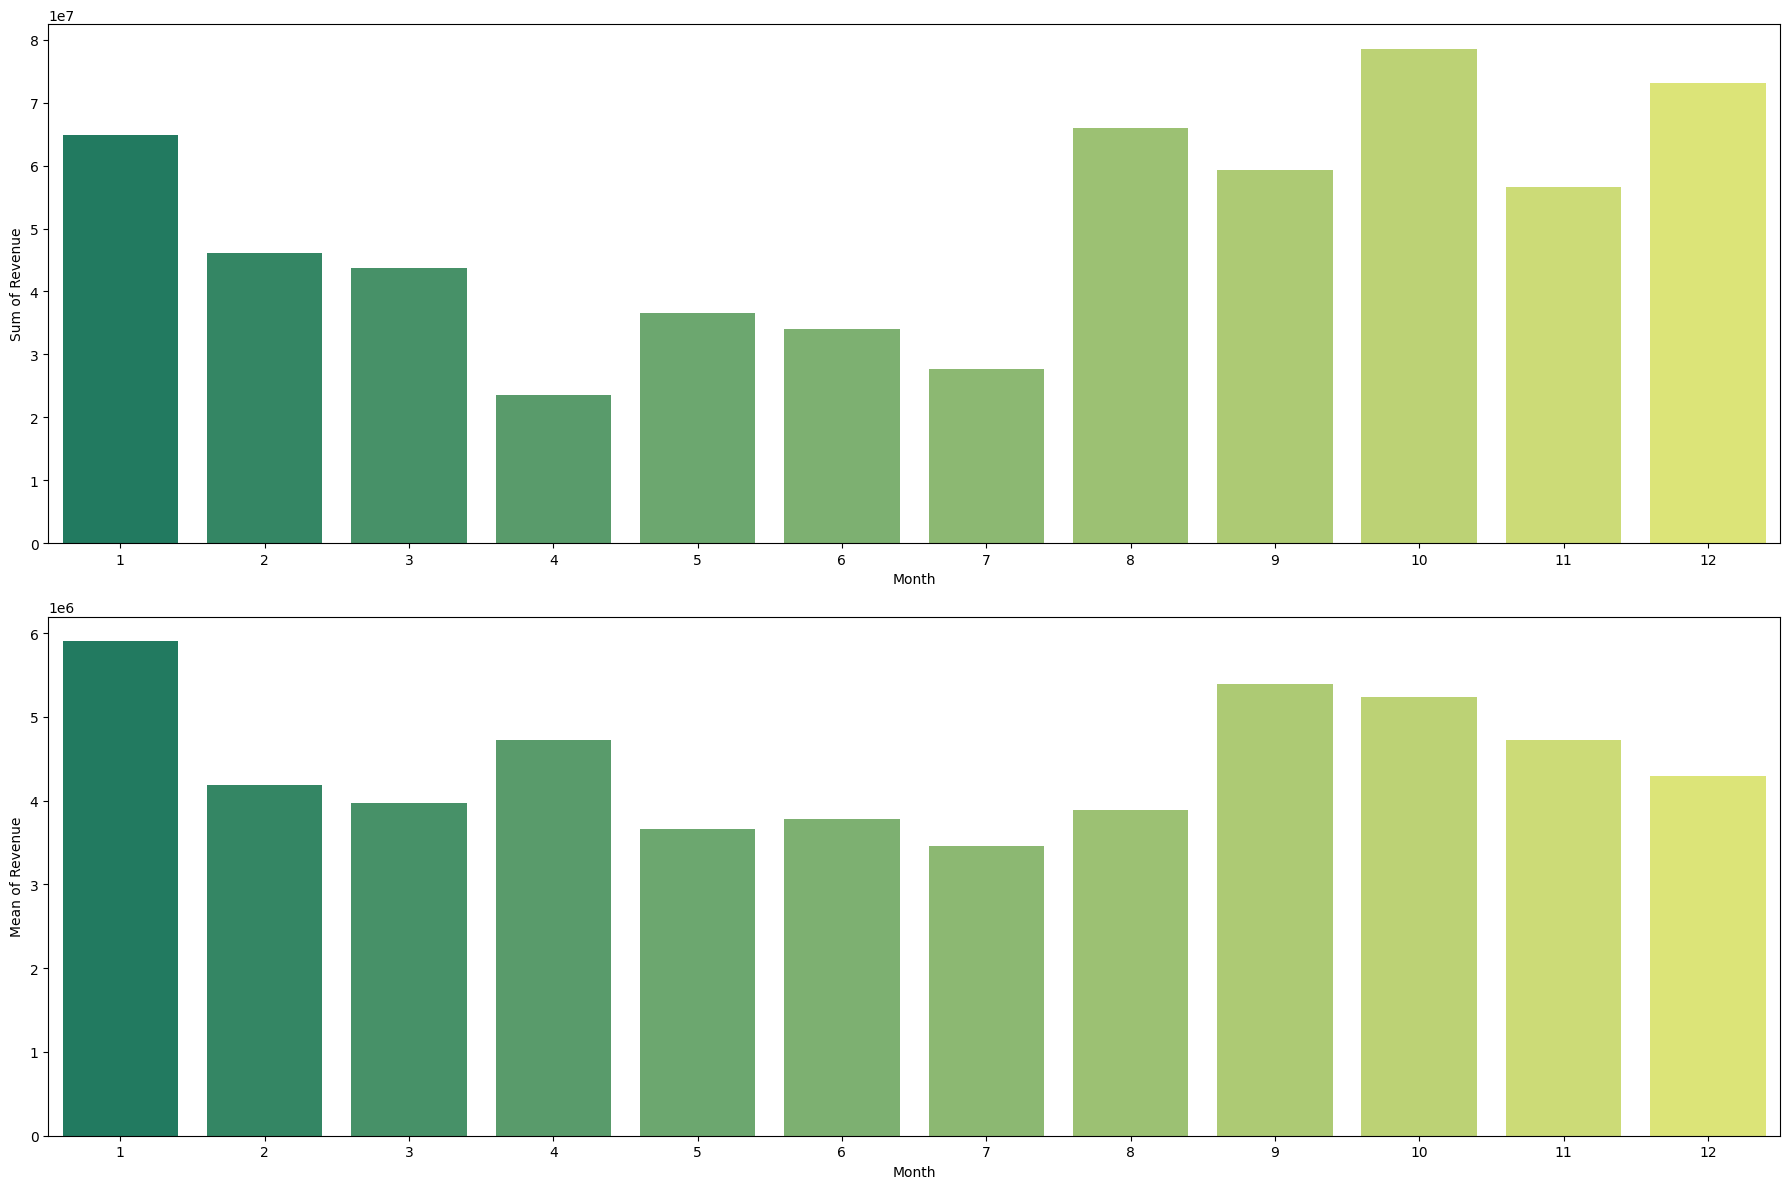

In [ ]:
Month_df = train_df.groupby("Month")["revenue"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1 = sns.barplot(x=Month_df["Month"],y=Month_df["sum"],ax=ax[0],palette = "summer")
ax1.set_ylabel("Sum of Revenue")
ax2 = sns.barplot(x=Month_df["Month"],y=Month_df["mean"],ax=ax[1],palette = "summer")
ax2.set_ylabel("Mean of Revenue")
plt.tight_layout()

<ipython-input-26-ad423fe197b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=Years_df["Years"],y=Years_df["sum"],ax=ax[0],palette = "summer")
<ipython-input-26-ad423fe197b6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=Years_df["Years"],y=Years_df["mean"],ax=ax[1],palette = "summer")


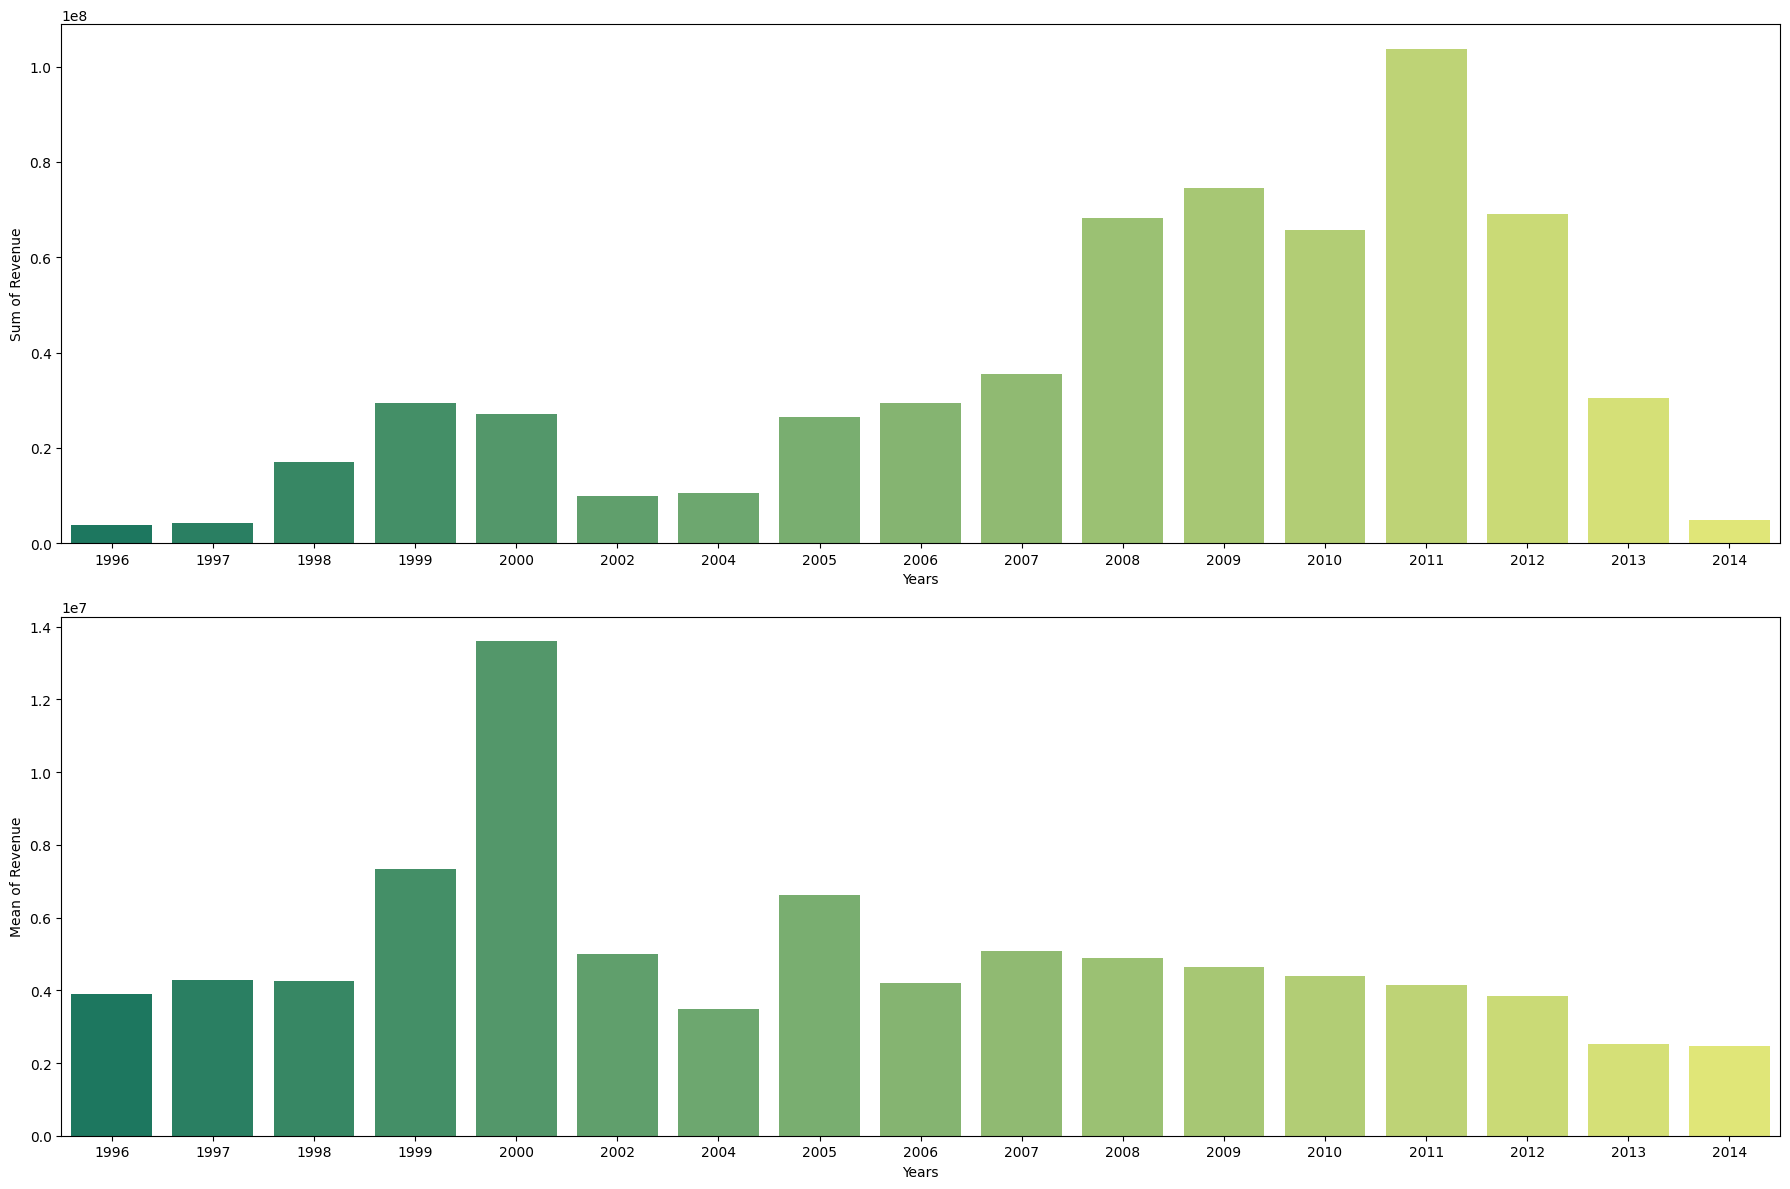

In [ ]:
Years_df = train_df.groupby("Years")["revenue"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1 = sns.barplot(x=Years_df["Years"],y=Years_df["sum"],ax=ax[0],palette = "summer")
ax1.set_ylabel("Sum of Revenue")
ax2 = sns.barplot(x=Years_df["Years"],y=Years_df["mean"],ax=ax[1],palette = "summer")
ax2.set_ylabel("Mean of Revenue")
plt.tight_layout()

<ipython-input-27-5472c4dd2a1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= train_df["revenue"])


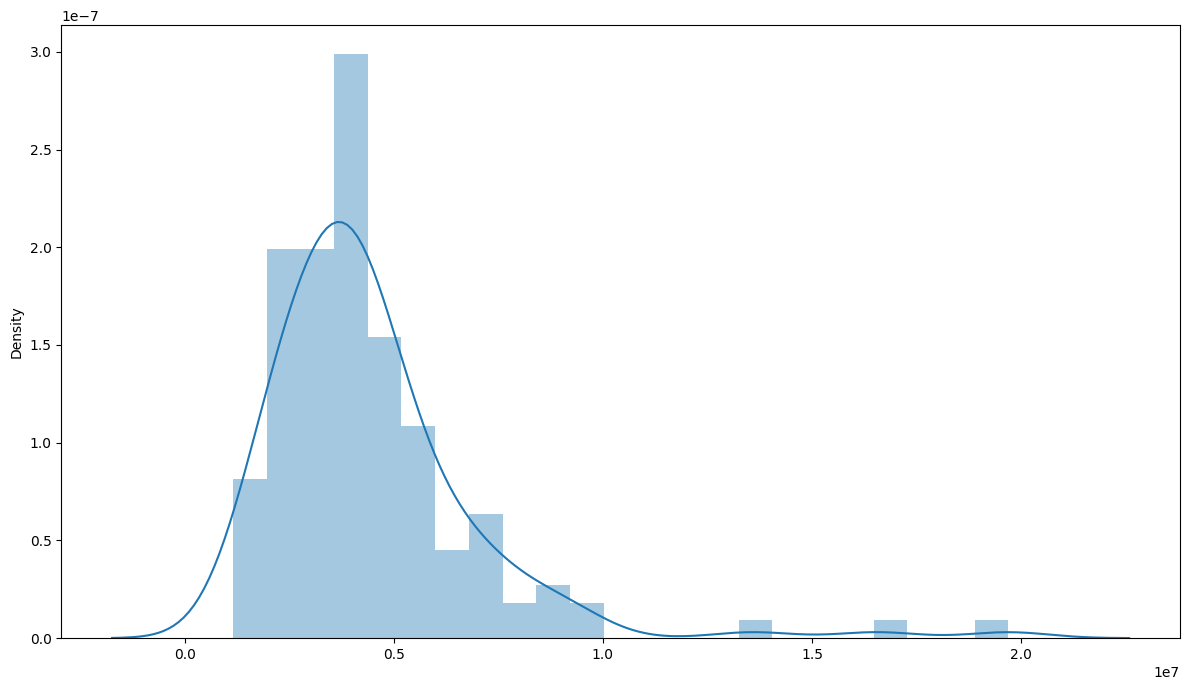

In [ ]:
plt.figure(figsize=(12,7))
sns.distplot(x= train_df["revenue"])
plt.tight_layout()

# Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

column_to_encode = 'City'

# Tạo instance của LabelEncoder
encoder = LabelEncoder()
# Fit và transform dữ liệu
train_df[column_to_encode] = encoder.fit_transform(train_df[column_to_encode])
# Kiểm tra kết quả
print(train_df[column_to_encode].head())

0    31
1     3
2    10
3    28
4    14
Name: City, dtype: int64


In [ ]:
train_df['City Group']=train_df['City Group'].map({'Big Cities':1,'Other':0})

In [ ]:
train_df['Type']=train_df['Type'].map({'FC':0,'IL':1,'DT':2,'MB':3})

In [ ]:
train_df.drop('Day_Name',axis=1,inplace=True)

In [ ]:
train_df.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,Day,Month,Years
0,0,31,1,1,4,5.0,4.0,4.0,2,2,...,4,5,5,4,3,4,5653753,17,7,1999
1,1,3,1,0,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,6923131,14,2,2008
2,2,10,0,1,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,2055379,9,3,2013
3,3,28,0,1,6,4.5,6.0,6.0,4,4,...,10,6,18,12,12,6,2675511,2,2,2012
4,4,14,0,1,3,4.0,3.0,4.0,2,2,...,3,2,3,4,3,3,4316715,9,5,2009


# Correlation

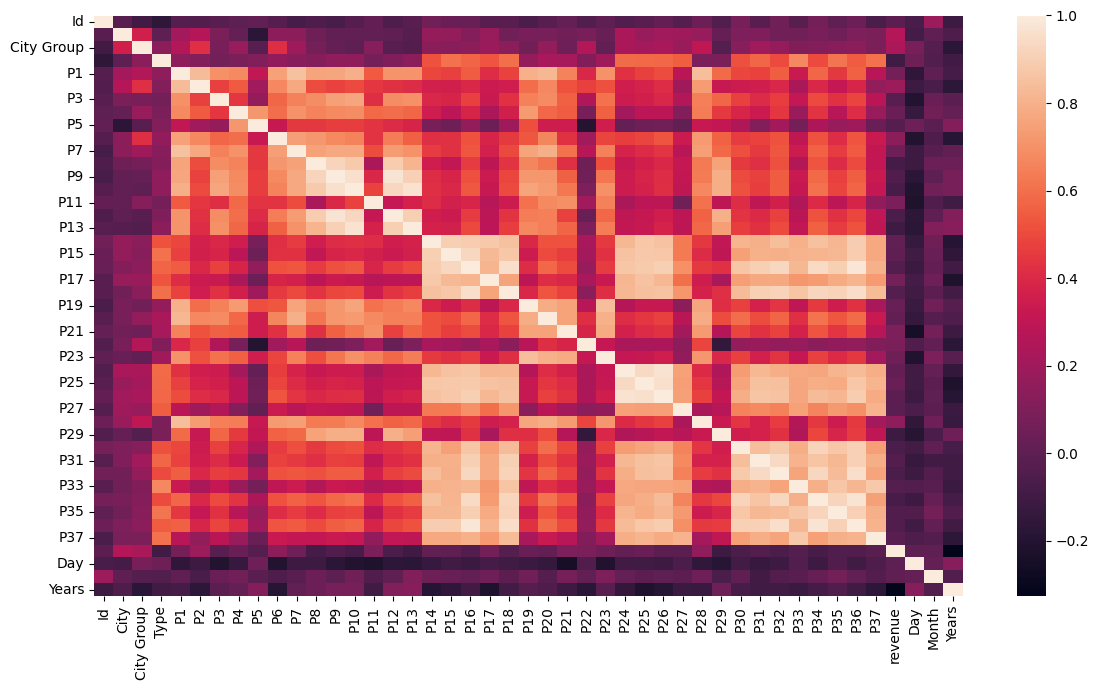

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(train_df.corr())
plt.tight_layout()

In [ ]:
corr = train_df.corr()["revenue"].abs()
sorted_corr = corr.sort_values()
num_to_drop = int(0.75* len(train_df.columns))
cols_to_drop = sorted_corr.iloc[:num_to_drop].index
df_corr = train_df.drop(cols_to_drop,axis=1)

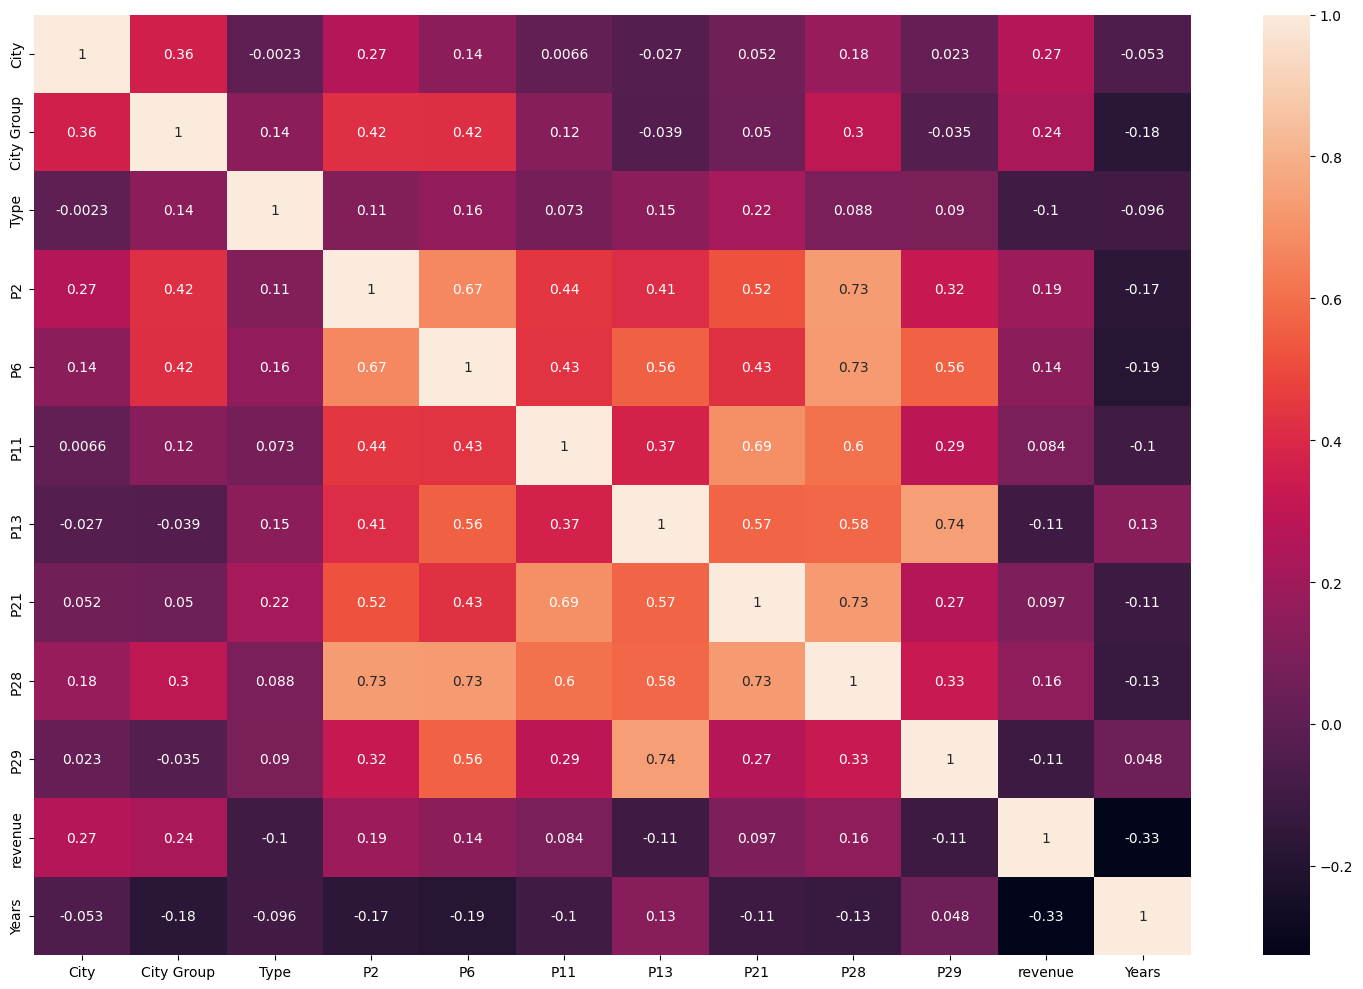

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(),annot=True)
plt.tight_layout()

# Models

In [ ]:
revenue_mean = train_df['revenue'].mean()
revenue_mean

4453532.613138686

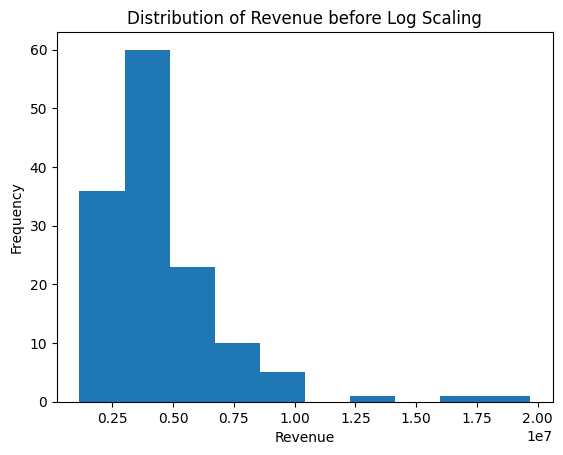

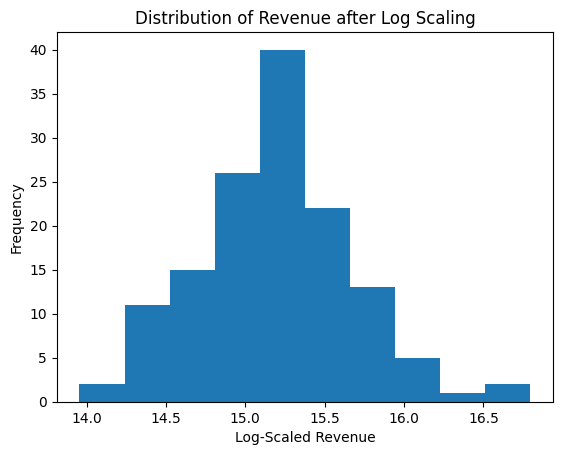

In [ ]:
import matplotlib.pyplot as plt

# Biểu đồ phân bố dữ liệu revenue trước khi Log Scaling
plt.hist(train_df['revenue'])
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue before Log Scaling')
plt.show()

# Thực hiện Log Scaling
train_df['revenue_log_scaled'] = np.log1p(train_df['revenue'])

# Biểu đồ phân bố dữ liệu revenue sau khi Log Scaling
plt.hist(train_df['revenue_log_scaled'])
plt.xlabel('Log-Scaled Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue after Log Scaling')
plt.show()


In [ ]:
# Lựa chọn cột cần chuẩn hóa log scaling
column_to_scale = 'revenue'
# Thêm cột mới lưu trữ giá trị log scaling
train_df['revenue_log_scaled'] = np.log1p(train_df[column_to_scale])

In [ ]:
X = train_df.drop("revenue_log_scaled",axis=1)
y = train_df["revenue_log_scaled"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# Khởi tạo mô hình
model = LinearRegression()
model.fit(X_train, y_train)
# Dự đoán giá trị trên tập test
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)


Mean Squared Error (MSE): 0.04805520293440841
Root Mean Squared Error (RMSE): 0.21921496968594187
Mean Absolute Error (MAE): 0.17403654893697532
Mean Absolute Percentage Error (MAPE): 1.139651984008713


**Support Vector Regressor**

In [ ]:
from sklearn.svm import SVR
model = SVR()

# Huấn luyện mô hình trên tập train
model.fit(X_train, y_train)
# Dự đoán giá trị trên tập test
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)


Mean Squared Error (MSE): 0.0046523867076759765
Root Mean Squared Error (RMSE): 0.06820840642967681
Mean Absolute Error (MAE): 0.0655666553125157
Mean Absolute Percentage Error (MAPE): 0.4327476609867818


Xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Predict values on the test data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Squared Error (MSE): 0.0006456480509556767
Root Mean Squared Error (RMSE): 0.02540960548602982
Mean Absolute Error (MAE): 0.019345420463082647
Mean Absolute Percentage Error (MAPE): 0.12700980525700042


**Lightgbm**

In [ ]:
import lightgbm as lgb
model = lgb.LGBMRegressor(verbose=-100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Squared Error (MSE): 0.004711562732531967
Root Mean Squared Error (RMSE): 0.06864082409566458
Mean Absolute Error (MAE): 0.05060260607389606
Mean Absolute Percentage Error (MAPE): 0.338308741413391
